In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction objectif à minimiser
def fonction_objectif(x):
    return np.sum(x ** 2)

# Classe Particule
class Particule:
    def __init__(self, dimension, limites):
        self.position = np.random.uniform(limites[0], limites[1], dimension)  # Position initiale
        self.vitesse = np.random.uniform(-1, 1, dimension)  # Vitesse initiale
        self.best_position = self.position.copy()  # Meilleure position personnelle
        self.best_valeur = float('inf')  # Meilleure valeur personnelle
        self.valeur = float('inf')  # Valeur courante


In [11]:
# Classe PSO
class PSO:
    def __init__(self, nb_particules, dimension, limites, iterations, w, c1, c2):
        self.nb_particules = nb_particules
        self.dimension = dimension
        self.limites = limites
        self.iterations = iterations
        self.w = w  # Poids d'inertie
        self.c1 = c1  # Coefficient cognitif
        self.c2 = c2  # Coefficient social
        self.particules = [Particule(dimension, limites) for _ in range(nb_particules)]
        self.global_best_position = np.zeros(dimension)  # Meilleure position globale
        self.global_best_valeur = float('inf')  # Meilleure valeur globale

    def optimiser(self):

        historique_valeurs = []  # Historique des valeurs globales pour visualisation

        for iteration in range(self.iterations):
            for particule in self.particules:
                # Calcul de la valeur de la fonction objectif
                particule.valeur = fonction_objectif(particule.position)
                # Mise à jour du meilleur personnel
                if particule.valeur < particule.best_valeur:
                    particule.best_valeur = particule.valeur
                    particule.best_position = particule.position.copy()
                # Mise à jour du meilleur global
                if particule.valeur < self.global_best_valeur:
                    self.global_best_valeur = particule.valeur
                    self.global_best_position = particule.position.copy()
            # Mise à jour des vitesses et positions
            for particule in self.particules:
                r1 = np.random.random(self.dimension)
                r2 = np.random.random(self.dimension)
                cognitive = self.c1 * r1 * (particule.best_position - particule.position)
                social = self.c2 * r2 * (self.global_best_position - particule.position)
                particule.vitesse = self.w * particule.vitesse + cognitive + social
                particule.position += particule.vitesse
                particule.position = np.clip(particule.position, self.limites[0], self.limites[1])

            historique_valeurs.append(self.global_best_valeur)
            print(f"Iteration {iteration + 1}/{self.iterations}, Meilleure Valeur: {self.global_best_valeur}")

        return self.global_best_position, self.global_best_valeur, historique_valeurs


In [12]:
# Visualisation du processus
def visualiser(historique_valeurs):

    plt.figure(figsize=(10, 5))
    plt.plot(historique_valeurs, marker='o', linestyle='-', color='blue')
    plt.title("Convergence de la meilleure valeur globale")
    plt.xlabel("Itération")
    plt.ylabel("Meilleure Valeur Globale")
    plt.grid()
    plt.show()

# Définir les paramètres du problème
dimension = 2

limites = (-10, 10)
nb_particules = 100
iterations = 1000
w = 0.99  # Poids d'inertie
c1 = 1.5  # Coefficient cognitif
c2 = 1.5  # Coefficient social

# Lancer l'optimisation PSO
pso = PSO(nb_particules, dimension, limites, iterations, w, c1, c2)
meilleure_position, meilleure_valeur, historique_valeurs = pso.optimiser()

# Résultats finaux
print(f"Meilleure Position: {meilleure_position}")
print(f"Meilleure Valeur: {meilleure_valeur}")



Iteration 1/1000, Meilleure Valeur: 1.5729465776780565
Iteration 2/1000, Meilleure Valeur: 0.05137759998026209
Iteration 3/1000, Meilleure Valeur: 0.05137759998026209
Iteration 4/1000, Meilleure Valeur: 0.05137759998026209
Iteration 5/1000, Meilleure Valeur: 0.05137759998026209
Iteration 6/1000, Meilleure Valeur: 0.05137759998026209
Iteration 7/1000, Meilleure Valeur: 0.017166322231516238
Iteration 8/1000, Meilleure Valeur: 0.017166322231516238
Iteration 9/1000, Meilleure Valeur: 0.017166322231516238
Iteration 10/1000, Meilleure Valeur: 0.017166322231516238
Iteration 11/1000, Meilleure Valeur: 0.017166322231516238
Iteration 12/1000, Meilleure Valeur: 0.017166322231516238
Iteration 13/1000, Meilleure Valeur: 0.017166322231516238
Iteration 14/1000, Meilleure Valeur: 0.017166322231516238
Iteration 15/1000, Meilleure Valeur: 0.017166322231516238
Iteration 16/1000, Meilleure Valeur: 0.017166322231516238
Iteration 17/1000, Meilleure Valeur: 0.017166322231516238
Iteration 18/1000, Meilleure V

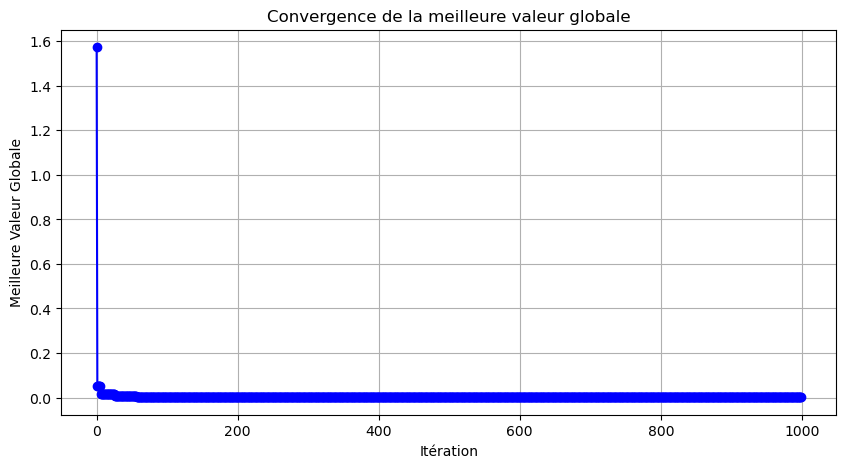

In [15]:
# Visualiser la convergence
visualiser(historique_valeurs)
